In [ ]:
#Banglore_Zomato

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import HTML
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

In [ ]:
import numpy as np
import pandas as pd

# loads the wine dataset into memory
Banglore_Zomato = pd.read_csv('/content/onlinedeliverydata.csv')

In [ ]:
# Check for missing values
missing_values = Banglore_Zomato.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [ ]:
categorical_columns = Banglore_Zomato.select_dtypes(include=['object']).columns

# Print unique entries for each categorical column
for column in categorical_columns:
    unique_entries = Banglore_Zomato[column].unique()
    print(f"Unique entries in '{column}':", unique_entries)

Unique entries in 'Gender': ['Female' 'Male']
Unique entries in 'Marital Status': ['Single' 'Married' 'Prefer not to say']
Unique entries in 'Occupation': ['Student' 'Employee' 'Self Employeed' 'House wife']
Unique entries in 'Monthly Income': ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Unique entries in 'Educational Qualifications': ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Unique entries in 'Medium (P1)': ['Food delivery apps' 'Walk-in' 'Direct call' 'Web browser']
Unique entries in 'Medium (P2)': [' Web browser' ' Direct call' ' Walk-in']
Unique entries in 'Meal(P1)': ['Breakfast' 'Snacks' 'Lunch' 'Dinner']
Unique entries in 'Meal(P2)': [' Lunch' ' Dinner' ' Snacks']
Unique entries in 'Perference(P1)': ['Non Veg foods (Lunch / Dinner)' 'Veg foods (Breakfast / Lunch / Dinner)'
 'Bakery items (snacks)' 'Sweets']
Unique entries in 'Perference(P2)': [' Bakery items (snacks)' ' Veg foods (Breakfast / Lunch / Dinner)'
 ' Ice cream / 

In [ ]:
Banglore_Zomato.drop('Reviews', axis=1, inplace=True)

In [ ]:
print('Data shape:', Banglore_Zomato.shape)
Banglore_Zomato.head()

Data shape: (388, 54)


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes


In [ ]:
Banglore_Zomato.describe()
Banglore_Zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [ ]:
Banglore_Zomato.dtypes

Age                                            int64
Gender                                        object
Marital Status                                object
Occupation                                    object
Monthly Income                                object
Educational Qualifications                    object
Family size                                    int64
latitude                                     float64
longitude                                    float64
Pin code                                       int64
Medium (P1)                                   object
Medium (P2)                                   object
Meal(P1)                                      object
Meal(P2)                                      object
Perference(P1)                                object
Perference(P2)                                object
Ease and convenient                           object
Time saving                                   object
More restaurant choices                       

In [ ]:
print('Labels, Label count:', np.unique(Banglore_Zomato['Output'], return_counts=True))


Labels, Label count: (array(['No', 'Yes'], dtype=object), array([ 87, 301]))


In [ ]:
print(Banglore_Zomato.shape)


(388, 54)


In [ ]:
Banglore_Zomato = Banglore_Zomato.drop(['latitude', 'longitude', 'Pin code'], axis=1)


In [ ]:
# Initialize an empty dictionary to store the mappings
category_mappings = {}

# Select columns with object data type
object_cols = Banglore_Zomato.select_dtypes(include='object').columns

# Apply label encoding and store mappings
for col in object_cols:
    # Convert column to category
    Banglore_Zomato[col] = Banglore_Zomato[col].astype('category')
    # Store the mapping of encoded numbers to original categories
    category_mappings[col] = dict(enumerate(Banglore_Zomato[col].cat.categories))
    # Apply encoding
    Banglore_Zomato[col] = Banglore_Zomato[col].cat.codes

# Now, category_mappings dictionary contains the original values and their corresponding mapped values


In [ ]:
for col, mapping in category_mappings.items():
    print(f"Column: {col}")
    for code, original_value in mapping.items():
        print(f"  {code}: {original_value}")
    print("-" * 30)  # Just a separator for readability


Column: Gender
  0: Female
  1: Male
------------------------------
Column: Marital Status
  0: Married
  1: Prefer not to say
  2: Single
------------------------------
Column: Occupation
  0: Employee
  1: House wife
  2: Self Employeed
  3: Student
------------------------------
Column: Monthly Income
  0: 10001 to 25000
  1: 25001 to 50000
  2: Below Rs.10000
  3: More than 50000
  4: No Income
------------------------------
Column: Educational Qualifications
  0: Graduate
  1: Ph.D
  2: Post Graduate
  3: School
  4: Uneducated
------------------------------
Column: Medium (P1)
  0: Direct call
  1: Food delivery apps
  2: Walk-in
  3: Web browser
------------------------------
Column: Medium (P2)
  0:  Direct call
  1:  Walk-in
  2:  Web browser
------------------------------
Column: Meal(P1)
  0: Breakfast
  1: Dinner
  2: Lunch
  3: Snacks
------------------------------
Column: Meal(P2)
  0:  Dinner
  1:  Lunch
  2:  Snacks
------------------------------
Column: Perference(P1)


In [ ]:
print(category_mappings['Gender'])


{0: 'Female', 1: 'Male'}


In [ ]:
Banglore_Zomato

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,1,2,0,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,1,2,3,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,2,3,1,0,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,0,6,1,1,3,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,2,4,2,0,2,...,2,0,0,1,0,0,0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,1,0,1,...,0,0,0,0,0,0,0,0,0,1
384,23,0,2,3,4,2,4,1,1,2,...,2,1,4,1,1,1,1,4,4,1
385,22,0,2,3,4,2,5,1,0,3,...,2,0,4,0,0,4,4,4,4,1
386,23,1,2,3,2,2,2,1,1,2,...,2,0,4,0,4,4,0,4,4,1


In [ ]:
# Checking for missing values in the Banglore_Zomato DataFrame

missing_values = Banglore_Zomato.isnull().sum()
missing_values


Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food quality                            0
Good Tracking system                         0
Self Cooking                                 0
Health Concer

In [ ]:
Banglore_Zomato

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,1,2,0,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,1,2,3,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,2,3,1,0,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,0,6,1,1,3,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,2,4,2,0,2,...,2,0,0,1,0,0,0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,1,0,1,...,0,0,0,0,0,0,0,0,0,1
384,23,0,2,3,4,2,4,1,1,2,...,2,1,4,1,1,1,1,4,4,1
385,22,0,2,3,4,2,5,1,0,3,...,2,0,4,0,0,4,4,4,4,1
386,23,1,2,3,2,2,2,1,1,2,...,2,0,4,0,4,4,0,4,4,1


In [ ]:
from sklearn.model_selection import train_test_split


# separation into data (X) and respective labels (y)
X, y = Banglore_Zomato.iloc[:, :50].values, Banglore_Zomato.iloc[:, 50].values
print('First 10 samples:', X[:10])
print('First 10 labels:', y[:10])
print()

First 10 samples: [[20  0  2  3  4  2  4  1  2  0  1  1  0  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  0  0  0  0  0  0  2  2  1  0  2  2  2  2  2  1  1  1  1  1  1
   1  1]
 [24  0  2  3  2  0  3  1  2  3  0  1  3  3  3  3  3  3  2  0  3  3  0  3
   3  3  3  3  3  3  3  3  3  2  0  1  3  2  1  4  0  2  4  4  4  4  4  4
   4  4]
 [22  1  2  3  2  2  3  1  0  2  2  1  1  3  3  3  2  2  1  2  1  2  2  0
   0  0  0  0  0  0  3  0  2  2  0  2  0  3  2  2  0  2  0  4  1  4  4  0
   4  1]
 [22  0  2  3  4  0  6  1  1  3  0  3  0  0  0  3  0  3  0  0  0  3  2  0
   1  1  2  0  0  0  1  1  2  2  0  1  1  0  0  2  0  2  4  0  1  4  4  4
   4  0]
 [22  1  2  3  2  2  4  2  0  2  0  1  3  0  0  0  0  0  2  2  0  3  3  0
   3  0  1  3  3  2  2  2  1  2  2  1  0  0  0  0  0  2  0  0  1  0  0  0
   4  4]
 [27  0  0  0  3  2  2  1  1  2  0  1  3  0  0  2  0  0  2  0  1  2  0  0
   0  0  0  3  3  3  0  3  3  2  0  2  2  0  2  2  2  2  0  4  4  4  4  4
   4  4]
 [22  1  2  3  4  0  3  1  0  2  0  1  3

In [ ]:

# split configuration
test_size = 0.3 # data percentage going to test
random_seed = 0 # save the seed for reproducibility

In [ ]:
# data split
X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y)

# train info
print('Train data shape:', X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()

Train data shape: (271, 50)
Train data labels, label count: (array([0, 1], dtype=int8), array([ 61, 210]))



In [ ]:

print('Test data shape',X_test.shape)
print('Test data labels, label count', np.unique(y_test, return_counts=True))

Test data shape (117, 50)
Test data labels, label count (array([0, 1], dtype=int8), array([26, 91]))


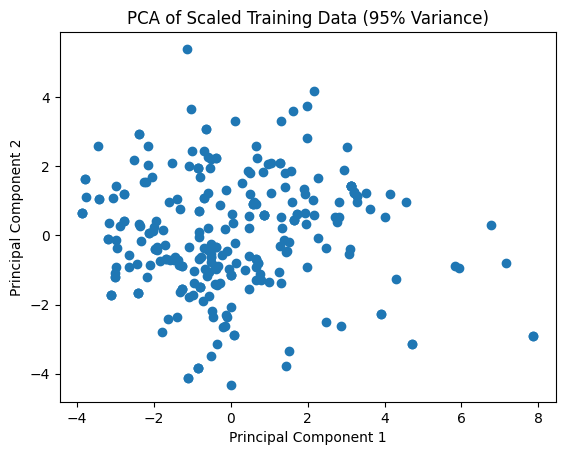

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_scaled and X_test_scaled are your scaled training and testing data

# Initialize PCA with the desired variance to keep (e.g., 95%)
pca = PCA(n_components=0.95)

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)

# Transform both training and testing data using the fitted PCA
pca_X_train = pca.transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

# Now, pca_X_train and pca_X_test are the transformed datasets with reduced dimensions

# Plotting the first two principal components of the transformed training data as an example
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Scaled Training Data (95% Variance)')
plt.show()


In [ ]:
#CPA

############
#     1 Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)



In [ ]:
X_train_scaled


array([[ 0.13433792, -1.1824678 , -1.56268327, ..., -0.97784893,
         1.09112233,  1.10675315],
       [ 1.14560391,  0.84568899, -1.56268327, ..., -0.39415497,
        -1.028549  , -1.05101738],
       [-0.53983941,  0.84568899,  0.66034647, ..., -0.39415497,
        -0.49863117, -1.05101738],
       ...,
       [ 0.13433792, -1.1824678 ,  0.66034647, ...,  1.35692693,
         1.09112233,  1.10675315],
       [-0.20275075,  0.84568899,  0.66034647, ..., -0.97784893,
        -1.028549  ,  1.10675315],
       [-0.87692808, -1.1824678 ,  0.66034647, ..., -0.97784893,
         1.09112233, -0.51157475]])

In [ ]:
X_test_scaled

array([[ 0.13433792,  0.84568899,  0.66034647, ...,  1.35692693,
         1.09112233,  1.10675315],
       [ 2.83104724,  0.84568899, -1.56268327, ..., -0.39415497,
        -1.028549  ,  1.10675315],
       [ 0.47142658, -1.1824678 , -1.56268327, ...,  1.35692693,
         1.09112233,  1.10675315],
       ...,
       [-0.53983941,  0.84568899,  0.66034647, ..., -0.39415497,
        -1.028549  ,  1.10675315],
       [ 1.14560391,  0.84568899, -1.56268327, ..., -0.97784893,
        -1.028549  , -1.05101738],
       [ 0.47142658,  0.84568899,  0.66034647, ...,  0.189539  ,
        -1.028549  , -0.51157475]])

For the target variable y in classification tasks, you typically do not need to standardize or scale the labels. The process of standardizing or scaling is applied to the features (X) to ensure that all input variables are on the same scale, which is particularly important for models that are sensitive to the scale of the input data, such as logistic regression, support vector machines, and neural networks.

The target variable y, on the other hand, represents the classes or labels in a classification task and does not require scaling. These labels are used as is for training and evaluating the model. For regression tasks where y is a continuous variable, standardization of y is also generally not required, although there might be exceptions depending on the specific modeling approach or if you're dealing with highly skewed target distributions.

In summary, for your classification task with the Banglore_Zomato dataset, you should proceed with the X_train_scaled and X_test_scaled for your features and use y_train and y_test directly for the labels without any modification or scaling.

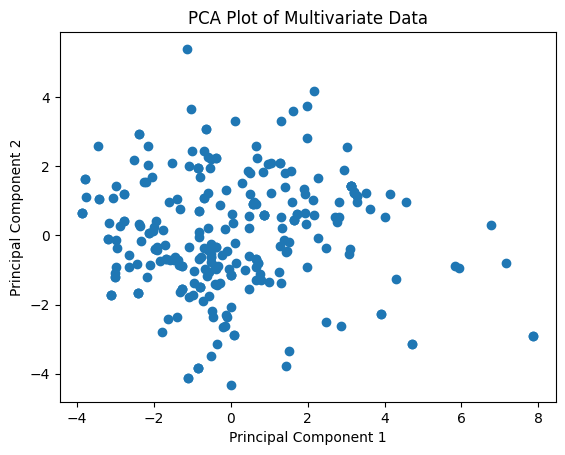

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming norm_X is your normalized dataset with more than two features
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_train_scaled)

# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Multivariate Data')
plt.show()

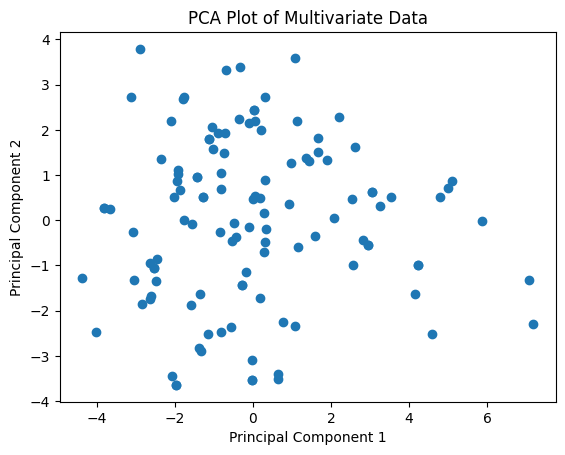

In [ ]:
# Assuming norm_X is your normalized dataset with more than two features
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_test_scaled)

# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Multivariate Data')
plt.show()

In [ ]:
#2 Covariance matrix computation

In [ ]:
# Assuming X_train_scaled is your scaled training data
cov_mat_train = np.cov(X_train_scaled, rowvar=False) # one sample per row, features in columns

# Display the covariance matrix for the training data
cov_mat_train

array([[ 1.0037037 ,  0.1189249 , -0.68019843, ..., -0.06782282,
        -0.13124383,  0.04473309],
       [ 0.1189249 ,  1.0037037 , -0.02615721, ..., -0.04250243,
        -0.062382  ,  0.00471004],
       [-0.68019843, -0.02615721,  1.0037037 , ...,  0.01374356,
         0.16251148,  0.06369659],
       ...,
       [-0.06782282, -0.04250243,  0.01374356, ...,  1.0037037 ,
         0.46030394,  0.36437839],
       [-0.13124383, -0.062382  ,  0.16251148, ...,  0.46030394,
         1.0037037 ,  0.54861184],
       [ 0.04473309,  0.00471004,  0.06369659, ...,  0.36437839,
         0.54861184,  1.0037037 ]])

In [ ]:
#Eigen

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat_train)
print('Eigenvalues:', eigen_vals)
print('Eigenvectors:\n', eigen_vecs)


Eigenvalues: [4.82007352 2.81555262 2.63149352 2.23816832 2.09322557 1.92469864
 1.8627986  1.70025492 1.54747952 1.46565509 1.38675677 1.35581197
 1.32010098 1.21373237 1.14408223 1.10153884 1.06328897 1.016555
 0.99427661 0.96915318 0.19259828 0.20602735 0.21636812 0.22290102
 0.2534495  0.26883292 0.28609705 0.91528916 0.89108904 0.34665179
 0.35307962 0.38048521 0.4113222  0.42931577 0.43493567 0.45495298
 0.46937798 0.84833634 0.52797232 0.55606324 0.57132285 0.59843638
 0.60817825 0.62834126 0.67357603 0.79278955 0.71787802 0.7294388
 0.76994081 0.76544045]
Eigenvectors:
 [[ 0.16190263 -0.20434901 -0.37638342 ... -0.09691722  0.01219019
   0.01138349]
 [ 0.09352555  0.06364557 -0.09757722 ...  0.04273923  0.13708129
  -0.04105222]
 [-0.17974115  0.22441836  0.35267337 ...  0.04855753 -0.06838195
  -0.14171034]
 ...
 [-0.19117721 -0.17853584 -0.03176665 ...  0.05699679  0.05415627
   0.16035175]
 [-0.26360172 -0.23077245  0.00470202 ...  0.05306451 -0.04890548
  -0.10840443]
 [-0.

Eigenvalues Selection and Projection Matrix Preparation


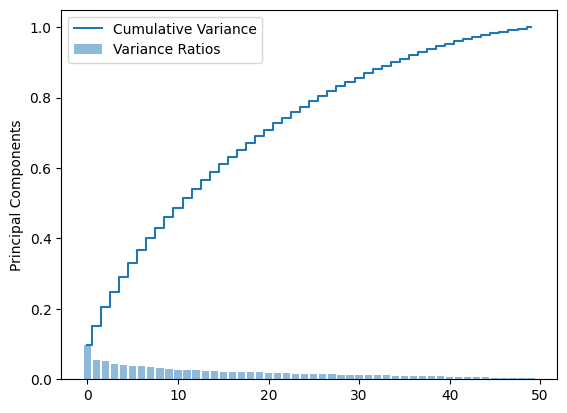

In [ ]:
import matplotlib.pyplot as plt

# computes the variance rations
eigen_sum = sum(eigen_vals)
var_dist = [i / eigen_sum for i in sorted(eigen_vals, reverse=True)] # from the largest to the smallest
plt.bar(range(len(eigen_vals)), var_dist, alpha=0.5, align='center', label='Variance Ratios')

# cumulative variances
cum_var = np.cumsum(var_dist)
plt.step(range(len(eigen_vals)), cum_var, where='mid', label='Cumulative Variance')

# graph plot setup
plt.ylabel('Variance Ratio')
plt.ylabel('Principal Components')
plt.legend(loc='best')
plt.show()

In [ ]:
# pairs of absolute eigenvalues and their respective eigenvectors
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
print('Eigenpairs:', eigen_pairs)

# sort the eigenpairs according to the absolute eigenvalues, from the largest to the smallest
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print('Sorted eigenpairs:', eigen_pairs)

Eigenpairs: [(4.8200735198590205, array([ 0.16190263,  0.09352555, -0.17974115, -0.20857915, -0.15696525,
       -0.0811117 ,  0.06783217,  0.02273219,  0.07195246,  0.13326337,
       -0.06504701, -0.02530809,  0.05938599, -0.24419978, -0.09992361,
       -0.12424761, -0.19627315, -0.12128328, -0.1623352 , -0.11941362,
       -0.15545559, -0.12684371, -0.09836454, -0.15090091, -0.08008759,
       -0.06342041, -0.09853983, -0.19646196, -0.13276323, -0.11550545,
       -0.09025784, -0.12429453, -0.08214878, -0.01347518, -0.05473786,
        0.02052372, -0.25924808, -0.04223607, -0.13534432, -0.20978461,
       -0.04484599, -0.05235449, -0.16658293, -0.17556375, -0.07969522,
       -0.1717661 , -0.26196932, -0.19117721, -0.26360172, -0.20282483])), (2.815552619306813, array([-0.20434901,  0.06364557,  0.22441836,  0.20200241,  0.1586387 ,
       -0.08371712, -0.21928277,  0.02737525,  0.08421655,  0.05304059,
       -0.0953327 , -0.2021015 ,  0.15886524, -0.16553111,  0.00568116,
       

In [ ]:
# W projection matrix computation
W = np.array([list(eigen_pairs[i][1]) for i in range(len(eigen_pairs))])
print('W projection shape:', W.shape)
print('W projection matrix:\n', W)

W projection shape: (50, 50)
W projection matrix:
 [[ 0.16190263  0.09352555 -0.17974115 ... -0.19117721 -0.26360172
  -0.20282483]
 [-0.20434901  0.06364557  0.22441836 ... -0.17853584 -0.23077245
  -0.22894331]
 [-0.37638342 -0.09757722  0.35267337 ... -0.03176665  0.00470202
  -0.05563043]
 ...
 [ 0.21629253  0.15330806  0.23654769 ...  0.04063242  0.1700649
  -0.32403358]
 [-0.30528489  0.0427246   0.03176412 ... -0.01233603  0.00937582
   0.12410971]
 [-0.51216874  0.152637   -0.39569219 ... -0.07646336  0.06580801
  -0.14938538]]
